In [72]:
import numpy as np
from plot_Herbert import *
from Herbert_functions import *

In [73]:
"""
model constants
"""
#True_std_model = 0.1
m_const = set_model_constants()
n = m_const["n"]  # number of gridpoints = 40

In [88]:
"""
Data assimilation constant: you can play with these
"""
#Default settings:
#ncyc = 10                         # Number of assimilation cycles
#dt = 5                           # Number of model timesteps between ovservations
#std_model = 0.1                 # Assumed standard deviation of true model error at the open boundary
#True_std_obs = 0.04             # Standard deviation of true observation error 
#std_obs = 0.04                  # Assumed Standard deviation of true observation error 
#obs_loc_h = np.arange(0,n,5)   # index array of which grid point are observed for h
#obs_loc_u = np.arange(0,n,5)    # index array of which grid point are observed for u
#nens = 100                      # number of ensemble members
#nexp = 10                        #number of experiments scores are averaged over 

da_const = set_constants()

In [82]:
"""
constant matrices that follow from previously defined constants
"""
H = np.identity(n*2+1)[da_const["obs_loc"],:]                              # Observation operator    
R = da_const["std_obs"]**2*np.identity(len(da_const["obs_loc"]))        # Observation error corvariance matrix

In [83]:
"""
create dictionary to store background, analysis, truth and observations for verification 
"""
states = {}

"""
Loop over experiments
"""
for j in range(da_const["nexp"]):
    
    """
    Initialize a random truth and a random analysis ensemble stored in "states"
    """
    analysis, truth, states = create_states_dict(j,states,m_const,da_const)
    
    """
    START DATA ASSIMILATION CYCLE
    """
    for t in range(0,da_const["ncyc"]):
        """
        Run the truth forward in time until the next assimilation step and create observations. 
        Note that this step is usually provided by nature and measurements obtained from weather stations, 
        wind profilers, radiosondes, aircraft reports, radars, satellites, etc.
        """
        truth, obs, states[j] = generate_obs(truth,states[j],da_const,m_const)
        
        """
        Predict
        """
        # Predict the state at the next assimilation step by running the analysis forward in time
        background, states[j] = predict(analysis,states[j],da_const,m_const)

        """
        Update
        """
        # Combine background and observations to get the analysis
        analysis, states[j] = update(background,obs,R,H,states[j],da_const,m_const)
    """
    END DATA ASSIMILATION CYCLE
    """
"""
end loop over experiments
"""

'\nend loop over experiments\n'

In [84]:
"""
Compute scores 
"""
rmse = get_scores(states,da_const,m_const)

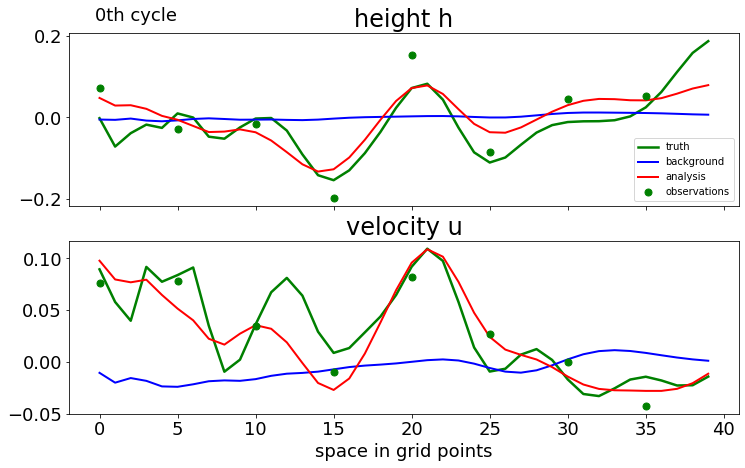

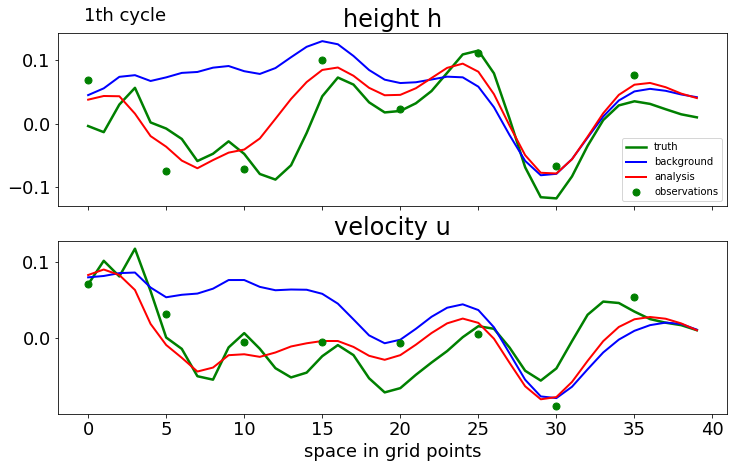

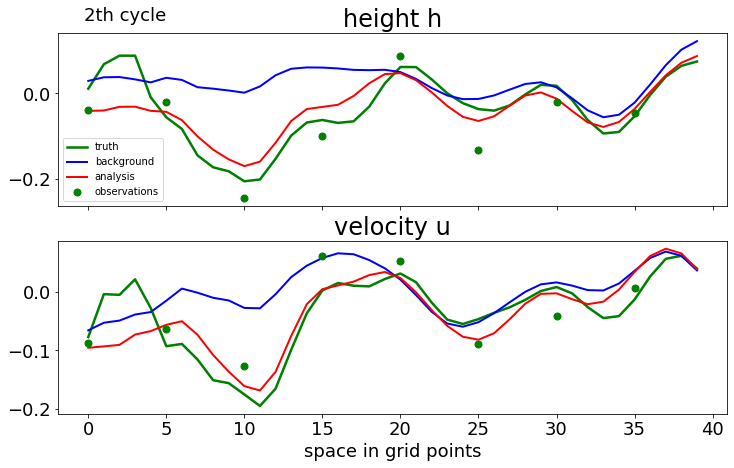

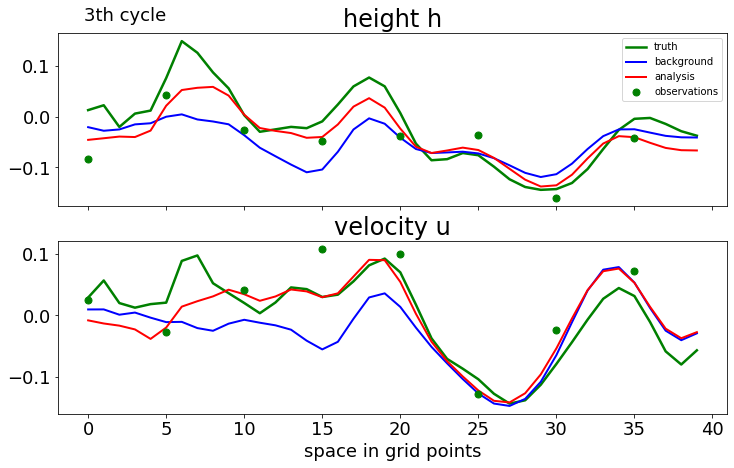

In [85]:
"""
plot snapshot of the state 
"""
cycles = [0,1,2,3]  # cycles you wish to see a snapshot of
f = snapshot(states,da_const,m_const,cycles)

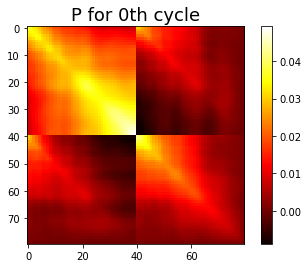

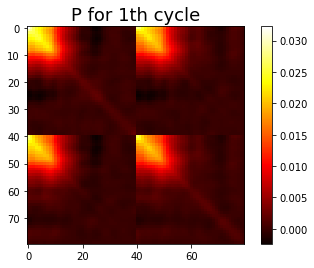

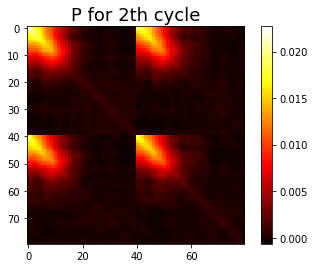

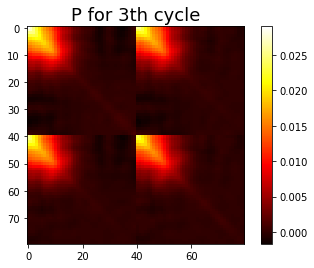

In [86]:
"""
plot snapshot of error covariance matrix P
"""
f = plot_P(states,m_const,cycles)

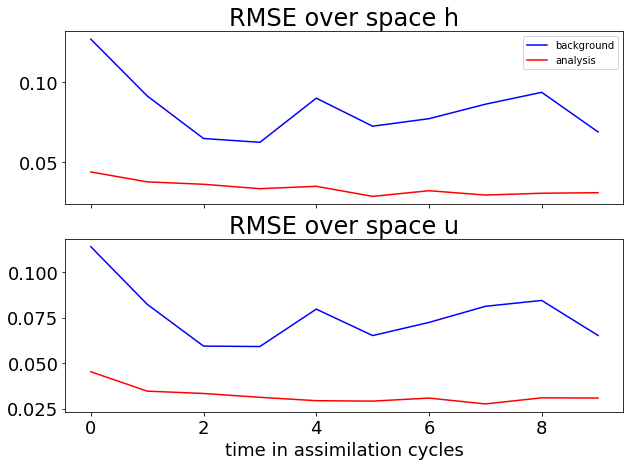

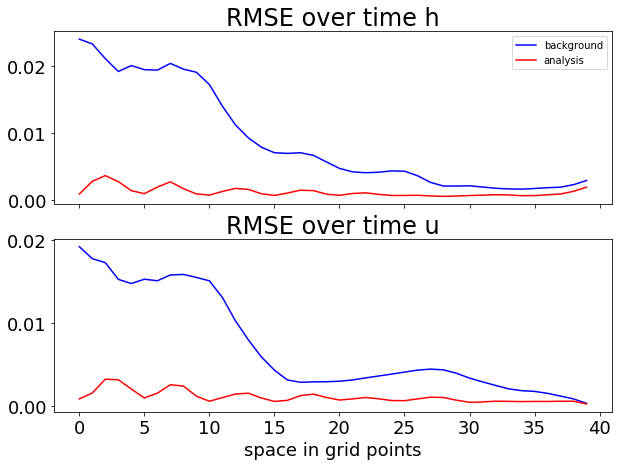

In [87]:
"""
plot RMSE over time and over space
"""
f = plot_scores(rmse)